<a href="https://colab.research.google.com/github/nih33/HeartAttackRiskPredictor/blob/main/Final_Project_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Step 1: Import required modules

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
from sklearn.tree import plot_tree

In [ ]:
#Step 2: Generate the dataset

# Download using Opendataset
!pip install opendatasets
import opendatasets as od

dataset = 'https://www.kaggle.com/datasets/fajobgiua/heart-attack-risk-assessment-dataset/data'
od.download(dataset)

# Interact with operating system
import os
data_dir = 'heart-attack-risk-assessment-dataset'
csv_path = os.path.join(data_dir, 'Heart_Attack_Risk_Levels_Dataset.csv')
attack_df = pd.read_csv(csv_path)

'''
#directly downloading csv file of dataset if the lines above do not work(aka you don't have a kaggle account)
attack_df = pd.read_csv('Heart_Attack_Risk_Levels_Dataset.csv')
attack_df.head()
'''

Skipping, found downloaded files in "./heart-attack-risk-assessment-dataset" (use force=True to force download)


"\n#directly downloading csv file of dataset if the lines above do not work(aka you don't have a kaggle account)\nattack_df = pd.read_csv('Heart_Attack_Risk_Levels_Dataset.csv')\nattack_df.head()\n"

In [ ]:
# Display attack_df
attack_df

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result,Risk_Level,Recommendation
0,63,1,66,160,83,160.0,1.80,0.012,negative,Moderate,Monitor closely and consult doctor
1,20,1,94,98,46,296.0,6.75,1.060,positive,High,Immediate medical attention
2,56,1,64,160,77,270.0,1.99,0.003,negative,Moderate,Monitor closely and consult doctor
3,66,1,70,120,55,270.0,13.87,0.122,positive,High,Immediate medical attention
4,54,1,64,112,65,300.0,1.08,0.003,negative,Moderate,Monitor closely and consult doctor
...,...,...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative,Moderate,Monitor closely and consult doctor
1315,66,1,84,125,55,149.0,1.33,0.172,positive,High,Immediate medical attention
1316,45,1,85,168,104,96.0,1.24,4.250,positive,High,Immediate medical attention
1317,54,1,58,117,68,443.0,5.80,0.359,positive,High,Immediate medical attention


In [ ]:
# Clean Data (Binary Encoding)

encoded_df = attack_df.copy()

encoded_df['Result_encoded'] = encoded_df['Result'].map({'negative': 0, 'positive': 1})

# removed outlier (heart rate of 1111 bpm)
encoded_df = encoded_df[encoded_df['Heart rate'] != 1111]

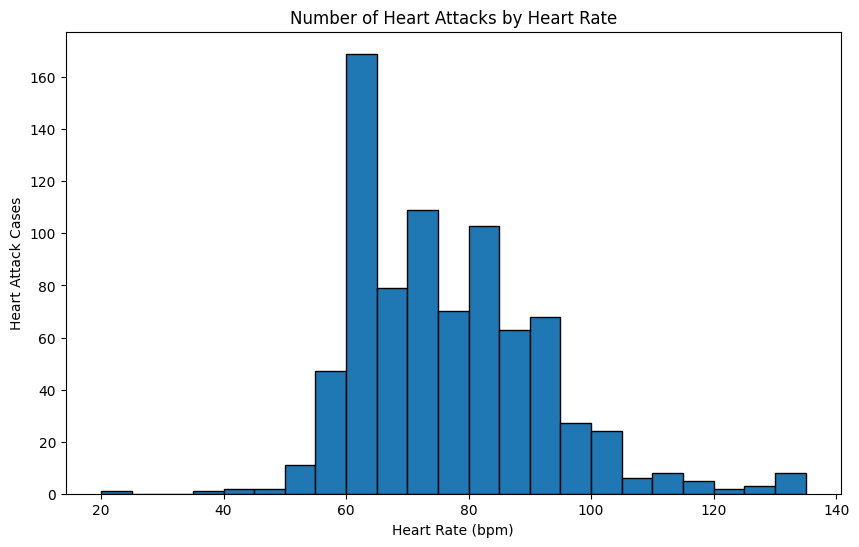

In [ ]:
# Step 3: Visualize the Data
#import seaborn as sns

# Bar Plot for Number of Heart Attacks by Heart Rate
heart_attack_data = encoded_df[encoded_df['Result_encoded'] == 1]
heart_rate_counts = heart_attack_data['Heart rate'].value_counts().sort_index()

plt.figure(figsize=(10,6))
plt.hist(heart_attack_data['Heart rate'], bins=range(20, 140, 5), edgecolor='black')
#plt.bar(heart_rate_counts.index, heart_rate_counts.values)
plt.xlabel("Heart Rate (bpm)")
plt.ylabel("Heart Attack Cases")
plt.title("Number of Heart Attacks by Heart Rate")
plt.show()

# Comment: The normal resting heart rate for adults is between 60 and 100 bpm. The bar plot shows that
#          most heart attack cases also fall within this range, especially between 60 and 70 bpm.
#          This suggests that heart rate alone may not be a strong indicator of a heart attack, as it
#          overlaps significantly with the normal range.



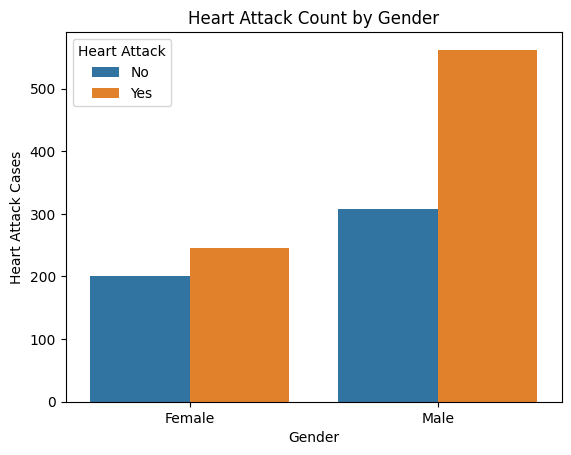

In [ ]:
sns.countplot(data=encoded_df, x='Gender', hue='Result')
plt.title("Heart Attack Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Heart Attack Cases")
plt.legend(title="Heart Attack", labels=['No','Yes'])
plt.xticks(ticks=[0,1], labels=['Female','Male'])
plt.show()

# Comment: Among male patients in the dataset, the number who have had a heart attack is roughly twice the number who have not.
#          In contrast, heart attack cases among female patients are more evenly split. Since the dataset contains more male patients
#          overall, it's important to consider this imbalance when interpreting the relationship between gender and heart attack occurrence.

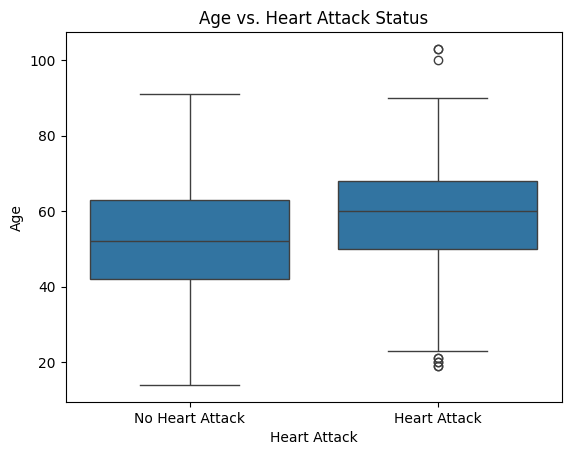

In [ ]:
sns.boxplot(data=encoded_df, x='Result', y='Age')
plt.xticks(ticks=[0,1], labels=['No Heart Attack','Heart Attack'])
plt.xlabel('Heart Attack')
plt.ylabel('Age')
plt.title('Age vs. Heart Attack Status')
plt.show()

# Comment: The median age is higher in the heart attack group, suggesting that age is associated with increased risk.
#          Additionally, the upper quartile and whiskers extend further, indicating a greater proportion of older individuals
#          in this group. However, the overlap between the two distributions shows that age alone is not a definitive predictor
#          of heart attack occurrence.


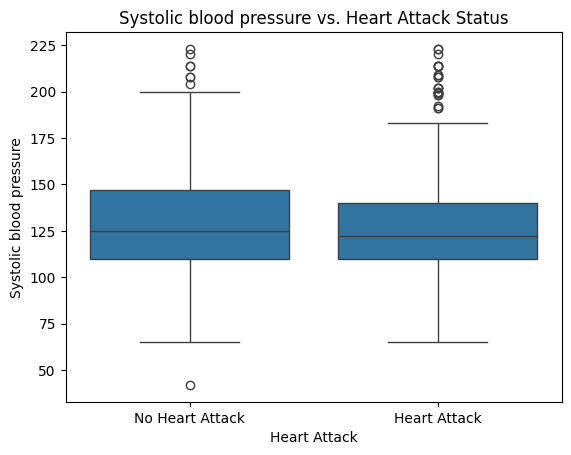

In [ ]:
sns.boxplot(data=encoded_df, x='Result', y='Systolic blood pressure')
plt.xticks(ticks=[0,1], labels=['No Heart Attack','Heart Attack'])
plt.xlabel('Heart Attack')
plt.ylabel('Systolic blood pressure')
plt.title('Systolic blood pressure vs. Heart Attack Status')
plt.show()

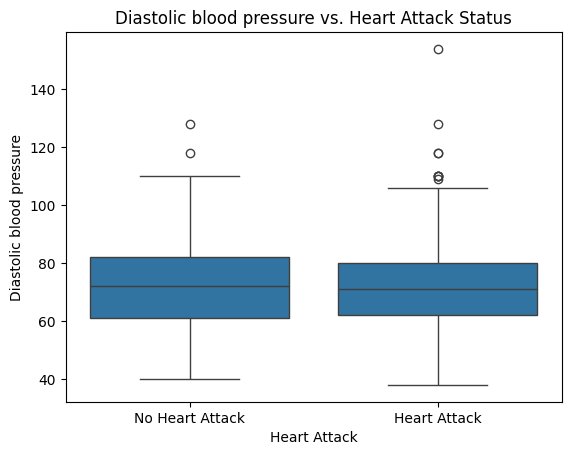

In [ ]:
sns.boxplot(data=encoded_df, x='Result', y='Diastolic blood pressure')
plt.xticks(ticks=[0,1], labels=['No Heart Attack','Heart Attack'])
plt.xlabel('Heart Attack')
plt.ylabel('Diastolic blood pressure')
plt.title('Diastolic blood pressure vs. Heart Attack Status')
plt.show()


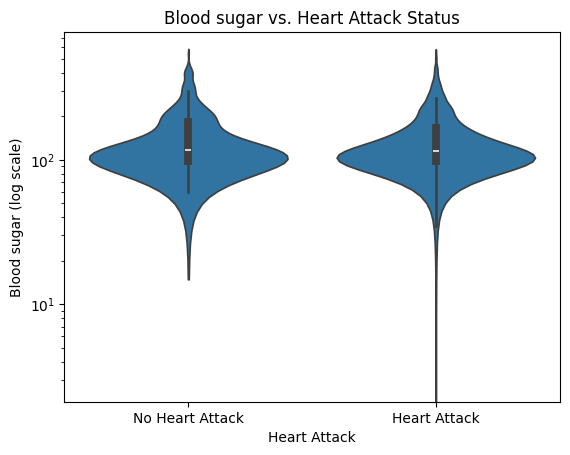

In [ ]:
sns.violinplot(data=encoded_df, x='Result', y='Blood sugar', density_norm='width')
plt.yscale('log')
plt.xticks(ticks=[0,1], labels=['No Heart Attack','Heart Attack'])
plt.xlabel('Heart Attack')
plt.ylabel('Blood sugar (log scale)')
plt.title('Blood sugar vs. Heart Attack Status')
plt.show()

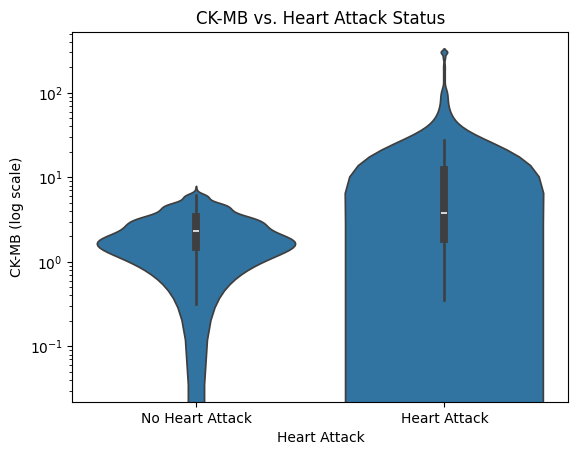

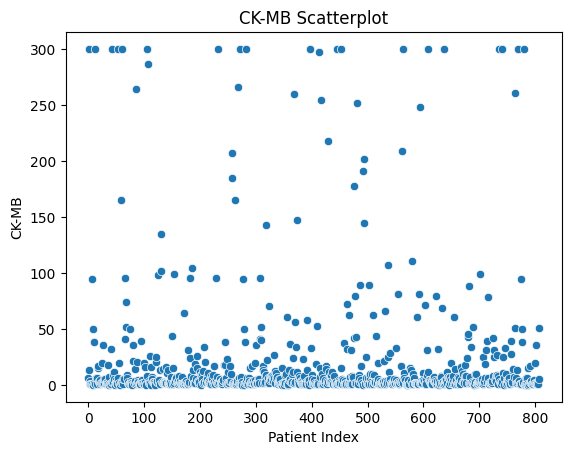

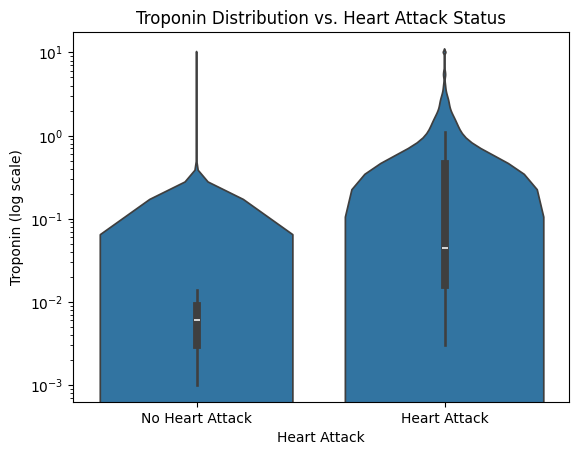

In [ ]:
# Box plot isn't good for CK-MB because it has extreme
# values. A distribution plot can highlight these trends better.
sns.violinplot(data=encoded_df, x='Result', y='CK-MB', density_norm='width')
plt.yscale('log')
plt.xticks(ticks=[0,1], labels=['No Heart Attack','Heart Attack'])
plt.xlabel('Heart Attack')
plt.ylabel('CK-MB (log scale)')
plt.title('CK-MB vs. Heart Attack Status')
plt.show()

sns.scatterplot(x=range(len(heart_attack_data)),y=heart_attack_data['CK-MB'])
plt.xlabel('Patient Index')
plt.ylabel('CK-MB')
plt.title('CK-MB Scatterplot')
plt.show()

# The CK‑MB violin plot (log scale) reveals that patients who experienced a heart attack have substantially higher
# CK‑MB levels than those who did not. The median CK‑MB for the heart‑attack group is roughly double that of the
# non‑attack group, and the distribution extends to much higher values, underscoring CK‑MB’s value as a marker.

# *Without log, all non-attack values would be squashed near the bottom*

# Box plot isn't good for troponin because it has extreme
# values. A distribution plot can highlight these trends better.
sns.violinplot(data=encoded_df, x='Result', y='Troponin', density_norm='width')
plt.yscale('log')
plt.xticks(ticks=[0,1], labels=['No Heart Attack','Heart Attack'])
plt.xlabel('Heart Attack')
plt.ylabel('Troponin (log scale)')
plt.title('Troponin Distribution vs. Heart Attack Status')
plt.show()
# The thickest part of the violin plot for patients without a heart attack is between 10⁻³ and 10⁻¹,
# indicating Troponin levels close to zero. In contrast, the distribution for patients who experienced a heart attack
# is broader and shifted upward, with most values between 10⁻² and 1. This suggests that patients with heart attacks
# tend to have significantly higher Troponin levels, even though many values are still below 1.0.

In [ ]:
# Step 4: Split the Dataset

from sklearn.preprocessing import StandardScaler

#X = encoded_df.iloc[:,0:8]
#X = encoded_df.iloc[:,[0,1,6,7]]
X = encoded_df.iloc[:,[0,6,7]]
y = encoded_df.iloc[:,11]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 11)

# Feature scaling
scaler = StandardScaler();
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Iteration 0: Cost 0.6926649373416166
Iteration 100: Cost 0.6550113976059784
Iteration 200: Cost 0.6316312747991149
Iteration 300: Cost 0.6160651473413259
Iteration 400: Cost 0.6049933712359592
Iteration 500: Cost 0.596672617814622
Iteration 600: Cost 0.5901316434846369
Iteration 700: Cost 0.5847977089401925
Iteration 800: Cost 0.5803163382727412
Iteration 900: Cost 0.5764589855015393


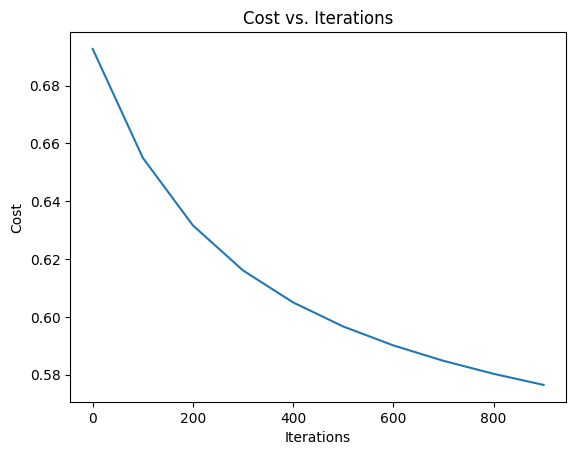

Accuracy: 0.7576
Precision: 0.7720
Recall: 0.8817
F1-score: 0.8232


In [ ]:
# Step 5: Perform Logistic Regression
# *WITHOUT L1 OR L2*

# Add bias term
X_train_bias = np.hstack([X_train_scaled, np.ones((X_train_scaled.shape[0], 1))])
X_test_bias = np.hstack([X_test_scaled, np.ones((X_test_scaled.shape[0], 1))])

def sigmoid(z):
    return 1/(1+np.exp(-z))

def compute_cost(X, y, w):
    m = len(y)
    h = sigmoid(X @ w)
    cost = -(1/m)*np.sum(y*np.log(h)+(1-y)*np.log(1-h))
    return cost

def gradient_descent(X, y, w, learning_rate, num_iterations):
    m = len(y)
    costs = []
    for i in range(num_iterations):
        h = sigmoid(X @ w)
        gradient = (1/m)*(X.T @ (h-y))
        w = w - learning_rate * gradient
        if i % 100 == 0:
            cost = compute_cost(X, y, w)
            costs.append(cost)
            print(f"Iteration {i}: Cost {cost}")
    return w, costs

w = np.zeros(X_train_bias.shape[1])

# Set hyperparameters
learning_rate = 0.01
num_iterations = 1000

# Run gradient descent
w_trained, costs = gradient_descent(X_train_bias, y_train, w, learning_rate, num_iterations)

# Plot the cost
import matplotlib.pyplot as plt
plt.plot(range(0, num_iterations, 100), costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. Iterations')
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Implement predict function
def predict(X, w):
    probabilities = sigmoid(X @ w)
    return np.array([1 if p>=0.5 else 0 for p in probabilities])

# Make predictions on test set
y_pred = predict(X_test_bias, w_trained)
y_pred_lr = y_pred.copy()

# Compute evaluation metrics

accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred,pos_label=1)
recall = recall_score(y_test,y_pred,pos_label=1)
f1 = f1_score(y_test,y_pred,pos_label=1)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


Training with lambda = 0.1
Iteration 0: Cost 0.6883811244885113
Iteration 100: Cost 0.5726682039340593
Iteration 200: Cost 0.551467504481175
Iteration 300: Cost 0.5391981135835843
Iteration 400: Cost 0.5305273055034339
Iteration 500: Cost 0.5238591605026659
Iteration 600: Cost 0.518473322686859
Iteration 700: Cost 0.5139793383323159
Iteration 800: Cost 0.5101409404454231
Iteration 900: Cost 0.5068040782240092
Accuracy with L2 (lambda=0.1): 0.7879
Precision: 0.8304
Recall: 0.8402
F1-score: 0.8232
L2 Norm of weights: 3.0711

Training with lambda = 1.0
Iteration 0: Cost 0.6883812816851975
Iteration 100: Cost 0.5731907544070509
Iteration 200: Cost 0.5525729925922854
Iteration 300: Cost 0.5409020294758453
Iteration 400: Cost 0.5328305888397324
Iteration 500: Cost 0.5267551951946589
Iteration 600: Cost 0.521952111375354
Iteration 700: Cost 0.5180293800734381
Iteration 800: Cost 0.5147501195319542
Iteration 900: Cost 0.5119601107797593
Accuracy with L2 (lambda=1.0): 0.7879
Precision: 0.8304


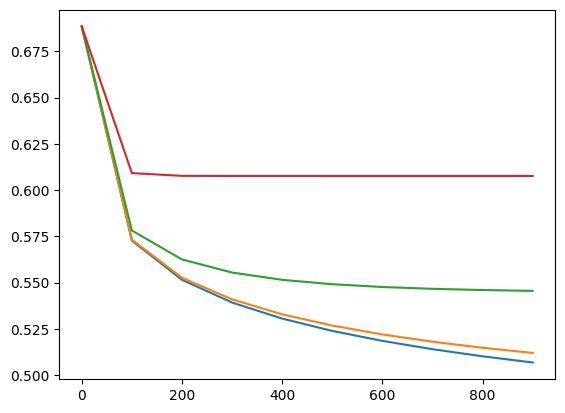

In [ ]:
def compute_cost_L2(X, y, w, lambda_):
    m = len(y)
    h = sigmoid(X @ w)
    cost = -(1/m)*np.sum(y*np.log(h)+(1-y)*np.log(1-h)) + (lambda_/(2*m))*np.sum(w[:-1]**2)
    return cost

# TODO: Modify gradient_descent for L2
def gradient_descent_L2(X, y, w, learning_rate, num_iterations, lambda_, verbose=True):
    m = len(y)
    costs = []
    # L2 penalty for weights, not bias
    for i in range(num_iterations):
        h = sigmoid(X @ w)
        gradient = (1/m) * (X.T @ (h-y))
        gradient[:-1] += (lambda_/m) * w[:-1]
        w = w - learning_rate * gradient
        if i % 100 == 0:
            cost = compute_cost_L2(X, y, w, lambda_)
            costs.append(cost)
            if(verbose):
              print(f"Iteration {i}: Cost {cost}")
    return w, costs

# Test multiple lambda values
lambda_values = [0.1, 1.0, 10.0, 100.0]
learning_rate = 0.1  # Increased to make regularization effect more visible
num_iterations = 1000

for lambda_ in lambda_values:
    # Initialize w
    w = np.zeros(X_train_bias.shape[1])

    # Train with L2
    print(f"\nTraining with lambda = {lambda_}")
    w_trained_L2, costs_L2 = gradient_descent_L2(X_train_bias, y_train, w, learning_rate, num_iterations, lambda_)

    # Plot cost
    plt.plot(range(0, num_iterations, 100), costs_L2, label=f'lambda={lambda_}')

    # Predict and evaluate
    y_pred_L2 = predict(X_test_bias, w_trained_L2)

    accuracy_L2 = accuracy_score(y_test, y_pred_L2)
    precision_L2 = precision_score(y_test,y_pred_L2,pos_label=1)
    recall_L2 = recall_score(y_test,y_pred_L2,pos_label=1)
    f1_L2 = f1_score(y_test,y_pred,pos_label=1)
    weight_norm = np.linalg.norm(w_trained_L2[:-1])  # Exclude bias
    print(f"Accuracy with L2 (lambda={lambda_}): {accuracy_L2:.4f}")
    print(f"Precision: {precision_L2:.4f}")
    print(f"Recall: {recall_L2:.4f}")
    print(f"F1-score: {f1_L2:.4f}")
    print(f"L2 Norm of weights: {weight_norm:.4f}")


# Updating L2 for lambda 0.1 to compare at the end:

# Initialize w
w = np.zeros(X_train_bias.shape[1])

# Train with L2
w_trained_L2, costs_L2 = gradient_descent_L2(X_train_bias, y_train, w, learning_rate, num_iterations, 0.1, verbose=False)

# Predict and evaluate
y_pred_L2 = predict(X_test_bias, w_trained_L2)


Training with lambda = 0.1
Iteration 0: Cost 0.6883842629599088
Iteration 100: Cost 0.5728095076860508
Iteration 200: Cost 0.5516225733546802
Iteration 300: Cost 0.5393451925062375
Iteration 400: Cost 0.5306553249835831
Iteration 500: Cost 0.5239613622886622
Iteration 600: Cost 0.5185452046086554
Iteration 700: Cost 0.5140177380929968
Iteration 800: Cost 0.5101435570917532
Iteration 900: Cost 0.506769196376382
Accuracy with L1 (lambda=0.1): 0.7879
Precision: 0.8304
Recall: 0.9053
F1-score: 0.8232
Number of near-zero weights: 0 out of 3

Training with lambda = 1.0
Iteration 0: Cost 0.6884126663991719
Iteration 100: Cost 0.5745949447325883
Iteration 200: Cost 0.5541150967758514
Iteration 300: Cost 0.5423720798202382
Iteration 400: Cost 0.5341252647001311
Iteration 500: Cost 0.527813945655293
Iteration 600: Cost 0.5227366147569977
Iteration 700: Cost 0.5185144148165152
Iteration 800: Cost 0.5149188071451282
Iteration 900: Cost 0.5118011799837408
Accuracy with L1 (lambda=1.0): 0.7879
Prec

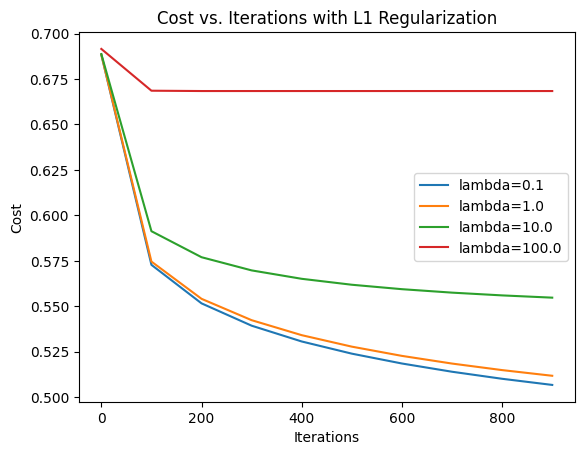

In [ ]:
# TODO: Modify compute_cost for L1
def compute_cost_L1(X, y, w, lambda_):
    m = len(y)
    h = sigmoid(X @ w)
    cost = -(1/m)*np.sum(y*np.log(h)+(1-y)*np.log(1-h)) + (lambda_/m)*np.sum(np.abs(w[:-1]))
    return cost

# TODO: Modify gradient_descent for L1
def gradient_descent_L1(X, y, w, learning_rate, num_iterations, lambda_, verbose=True):
    m = len(y)
    costs = []
    # L1 penalty for weights, not bias
    for i in range(num_iterations):
        h = sigmoid(X @ w)
        gradient = (1/m) * (X.T @ (h-y))
        gradient[:-1] += (lambda_/m)*np.sign(w[:-1])
        w = w - learning_rate * gradient
        if i % 100 == 0:
            cost = compute_cost_L1(X, y, w, lambda_)
            costs.append(cost)
            if(verbose):
              print(f"Iteration {i}: Cost {cost}")
    return w, costs

# Test multiple lambda values
lambda_values = [0.1, 1.0, 10.0, 100.0]
learning_rate = 0.1  # Increased to make regularization effect more visible
num_iterations = 1000

for lambda_ in lambda_values:
    # Initialize w
    w = np.zeros(X_train_bias.shape[1])

    # Train with L1
    print(f"\nTraining with lambda = {lambda_}")
    w_trained_L1, costs_L1 = gradient_descent_L1(X_train_bias, y_train, w, learning_rate, num_iterations, lambda_)

    # Plot cost
    plt.plot(range(0, num_iterations, 100), costs_L1, label=f'lambda={lambda_}')

    # Predict and evaluate
    y_pred_L1 = predict(X_test_bias, w_trained_L1)
    accuracy_L1 = accuracy_score(y_test, y_pred_L1)
    precision_L1 = precision_score(y_test,y_pred_L1,pos_label=1)
    recall_L1 = recall_score(y_test,y_pred_L1,pos_label=1)
    f1_L1 = f1_score(y_test,y_pred,pos_label=1)
    num_zeros = np.sum(np.abs(w_trained_L1[:-1]) < 1e-5)  # Count near-zero weights
    print(f"Accuracy with L1 (lambda={lambda_}): {accuracy_L1:.4f}")
    print(f"Precision: {precision_L1:.4f}")
    print(f"Recall: {recall_L2:.4f}")
    print(f"F1-score: {f1_L2:.4f}")
    print(f"Number of near-zero weights: {num_zeros} out of {len(w_trained_L1[:-1])}")

plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. Iterations with L1 Regularization')
plt.legend()
plt.show()


# Updating L1 for lambda 0.1 to compare at the end:

# Initialize w
w = np.zeros(X_train_bias.shape[1])

# Train with L2
w_trained_L1, costs_L1 = gradient_descent_L1(X_train_bias, y_train, w, learning_rate, num_iterations, 0.1, verbose=False)

# Predict and evaluate
y_pred_L1 = predict(X_test_bias, w_trained_L1)

In [ ]:
# Alternative Approach

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 6: Make prediction using the model

y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.8106060606060606

Accuracy: 0.9886
Precision: 0.9940
Recall: 0.9882
F1-score: 0.9911

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98        95
           1       0.99      0.99      0.99       169

    accuracy                           0.99       264
   macro avg       0.99      0.99      0.99       264
weighted avg       0.99      0.99      0.99       264



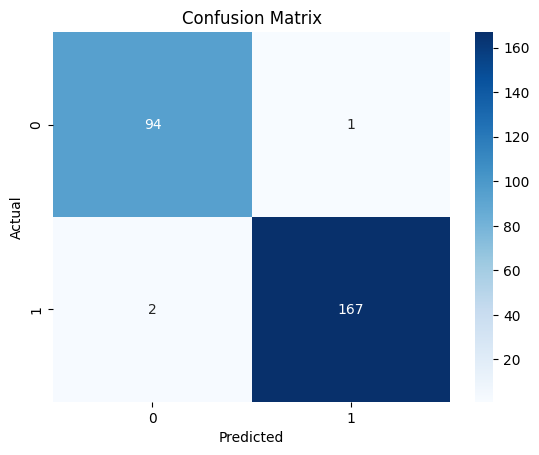

In [ ]:
#Making the Decision Tree Model
'''
#converting categorical variables to numeric using label encoding
#df_encoded = pd.get_dummies(df, drop_first = True)
risk_mapping = {'Low': 1, 'Moderate': 2, 'High': 3}
recommendation_mapping = {'Maintain healthy lifestyle': 1, 'Monitor closely and consult doctor': 2, 'Immediate medical attention': 3}
#result_mapping = {'negative': 0, 'positive': 1}

df_encoded = df
df_encoded['Risk_Level'] = df_encoded['Risk_Level'].map(risk_mapping)
df_encoded['Recommendation'] = df_encoded['Recommendation'].map(recommendation_mapping)
df_encoded['Result'] = df_encoded['Result'].map(result_mapping)

#df_encoded.rename(columns = {'Result_positive': 'Result'}, inplace = True)
df_encoded.head()

#Decision Tree Model
#tends to overfit, so we can implement the following methods)
#pruning
#set stopping criteria to something other than the leaf nodes being pure
#ensemble method (randome forest model?)
#Very sensitive (dependent on the data it is trained on)
#very explainable/visualization, and very minimial data preparation (does feature selection for you)

X = df_encoded.drop('Result', axis = 1)
y = df_encoded['Result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)
'''
dt_model = DecisionTreeClassifier(random_state = 42)
dt_model.fit(X_train, y_train) #no need to scale

y_pred = dt_model.predict(X_test)

#accuracy and other stats
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label = 1)
recall = recall_score(y_test, y_pred, pos_label = 1)
f1 = f1_score(y_test, y_pred, pos_label = 1)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

#classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

#confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


<Axes: >

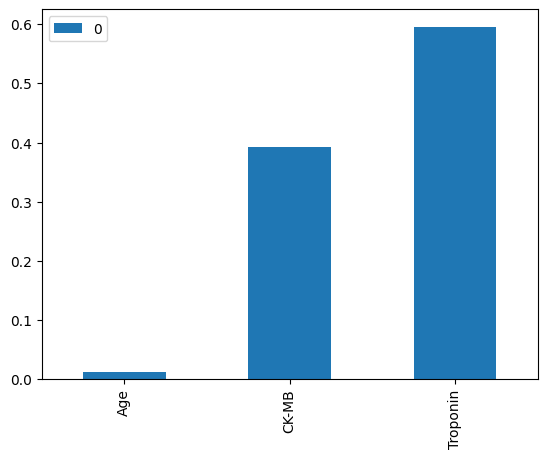

In [ ]:
#feature importance according to decision tree classifier
feature_names = X.columns
feature_names
dt_model.feature_importances_
feature_importance = pd.DataFrame(dt_model.feature_importances_, index = feature_names).sort_values(0)
features = list(feature_importance[feature_importance[0]>0].index)
feature_importance.head(10).plot(kind='bar')


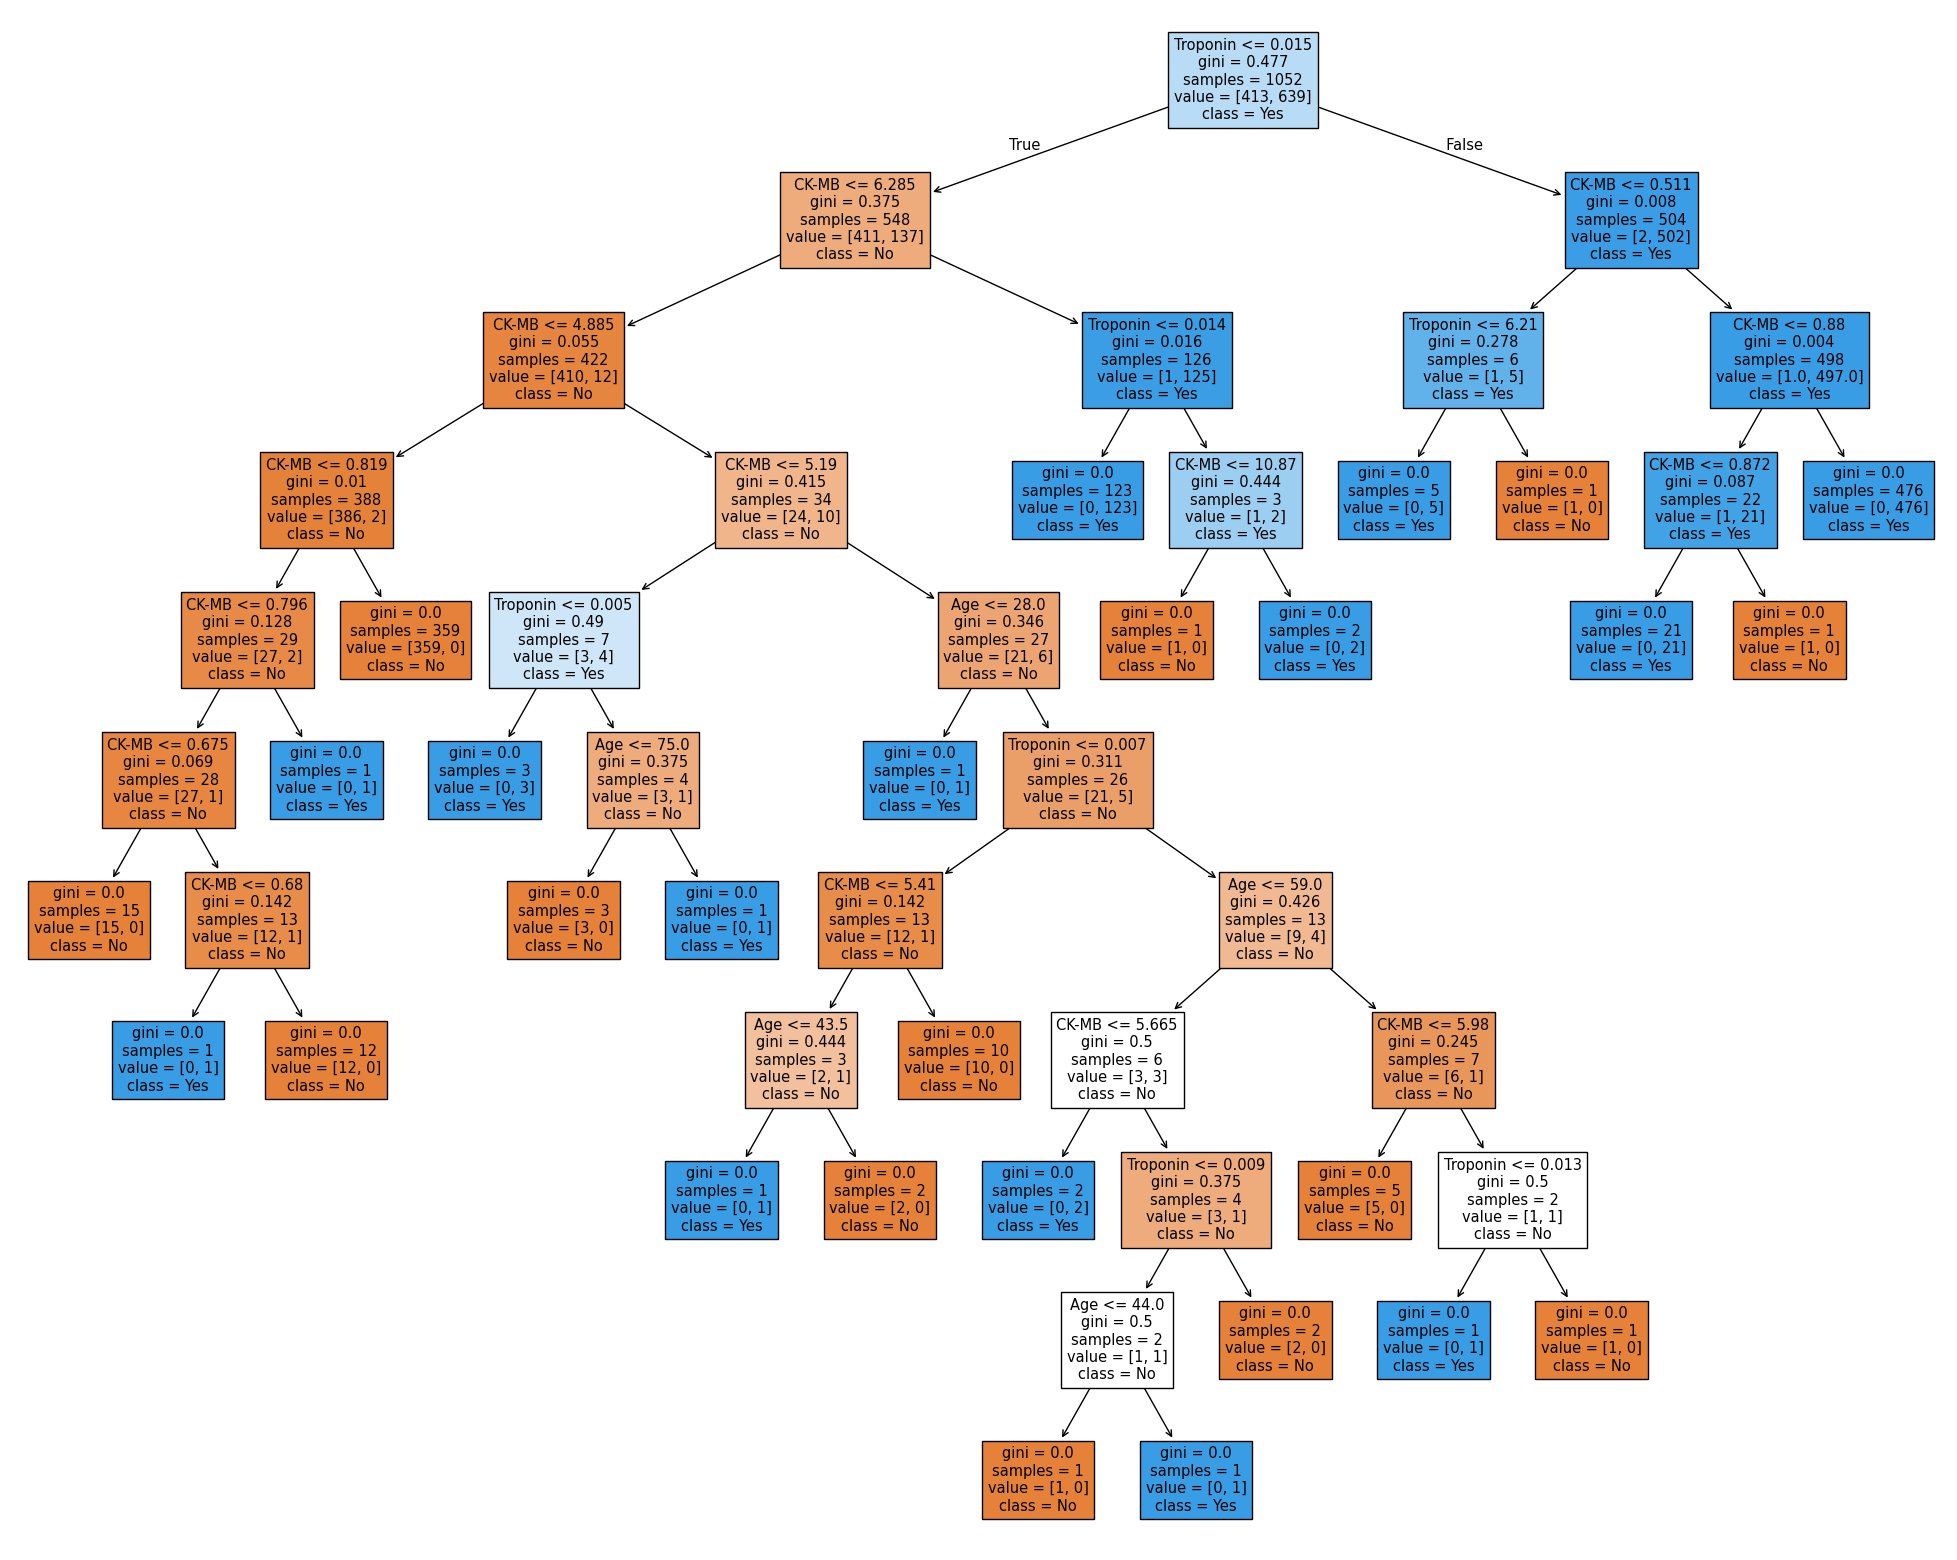

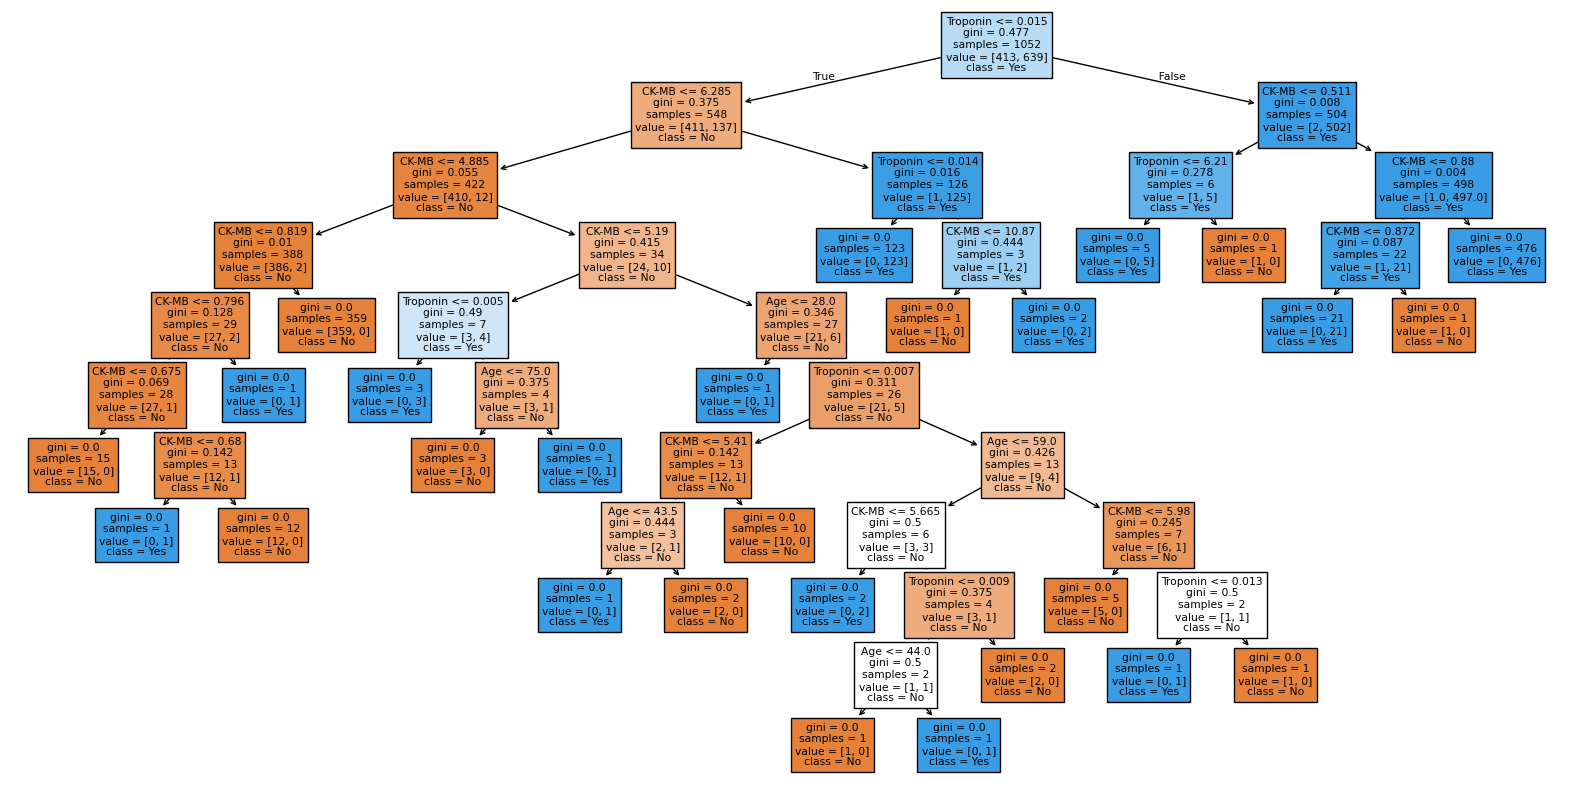

In [ ]:
#tree visualization
from sklearn import tree
fig = plt.figure(figsize = (25, 20))
_ = tree.plot_tree(dt_model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()

#add randomization to the model, example synthesize some data and see how the model performs

In [ ]:
#With pruning decision tree model
dt_model = DecisionTreeClassifier(ccp_alpha = 0.01, random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)
y_pred_dt_pruned = y_pred_dt

#accuracy and other stats
accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt, pos_label = 1)
recall = recall_score(y_test, y_pred_dt, pos_label = 1)
f1 = f1_score(y_test, y_pred_dt, pos_label = 1)

print(f"Pruned Accuracy: {accuracy:.4f}")
print(f"Pruned Precision: {precision:.4f}")
print(f"Pruned Recall: {recall:.4f}")
print(f"Pruned F1-score: {f1:.4f}")

#print("Decision Tree (Pruned) Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

print("finished")


Pruned Accuracy: 0.9924
Pruned Precision: 1.0000
Pruned Recall: 0.9882
Pruned F1-score: 0.9940

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        95
           1       1.00      0.99      0.99       169

    accuracy                           0.99       264
   macro avg       0.99      0.99      0.99       264
weighted avg       0.99      0.99      0.99       264

finished


Accuracy: 0.9747
Precision: 0.9817
Recall: 0.9781
F1-score: 0.9799

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       161
           1       0.98      0.98      0.98       274

    accuracy                           0.97       435
   macro avg       0.97      0.97      0.97       435
weighted avg       0.97      0.97      0.97       435



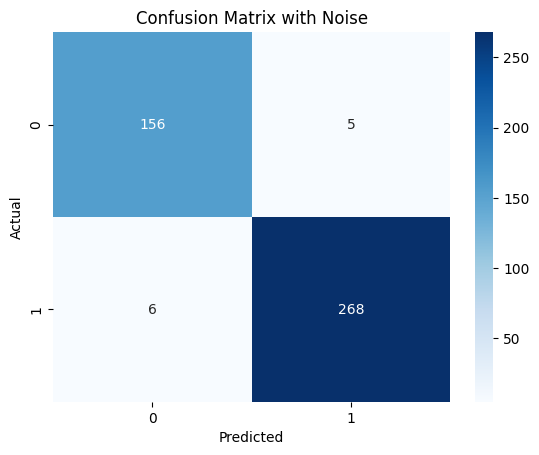

In [ ]:
#to check for overfitting of decision tree model by adding noise
#injectting 5 random noise features
df_n = encoded_df.copy()
np.random.seed(42)
for i in range(5):
    df_n[f'noise_feature_{i}'] = np.random.rand(len(df_n))

#converting categorical variables to numeric using label encoding
risk_mapping = {'Low': 1, 'Moderate': 2, 'High': 3}
recommendation_mapping = {'Maintain healthy lifestyle': 1, 'Monitor closely and consult doctor': 2, 'Immediate medical attention': 3}
#result_mapping = {'negative': 0, 'positive': 1}

df_n['Risk_Level'] = df_n['Risk_Level'].map(risk_mapping)
df_n['Recommendation'] = df_n['Recommendation'].map(recommendation_mapping)
#df_n['Result'] = df_n['Result'].map(result_mapping)


#train/test split
X_n = encoded_df.iloc[:,[0,6,7]]
y_n = encoded_df.iloc[:,11]
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_n, y_n, test_size=0.33, random_state=42)

#train decision tree
dt_model_n = DecisionTreeClassifier(random_state=42)
dt_model_n.fit(X_train_n, y_train_n)

#predict and evaluate
y_pred_n = dt_model_n.predict(X_test_n)
accuracy_n = accuracy_score(y_test_n, y_pred_n)
precision_n = precision_score(y_test_n, y_pred_n)
recall_n = recall_score(y_test_n, y_pred_n)
f1_n = f1_score(y_test_n, y_pred_n)

print(f"Accuracy: {accuracy_n:.4f}")
print(f"Precision: {precision_n:.4f}")
print(f"Recall: {recall_n:.4f}")
print(f"F1-score: {f1_n:.4f}")
print("\nClassification Report:\n", classification_report(y_test_n, y_pred_n))

#confusion matrix
conf_matrix_n = confusion_matrix(y_test_n, y_pred_n)
sns.heatmap(conf_matrix_n, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix with Noise")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
#Random Forest to compare with Decision Tree and ensure no overfitting of data
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_rf):.4f}")


Random Forest Results:
Accuracy: 0.9924
Precision: 1.0000
Recall: 0.9882
F1-score: 0.9940


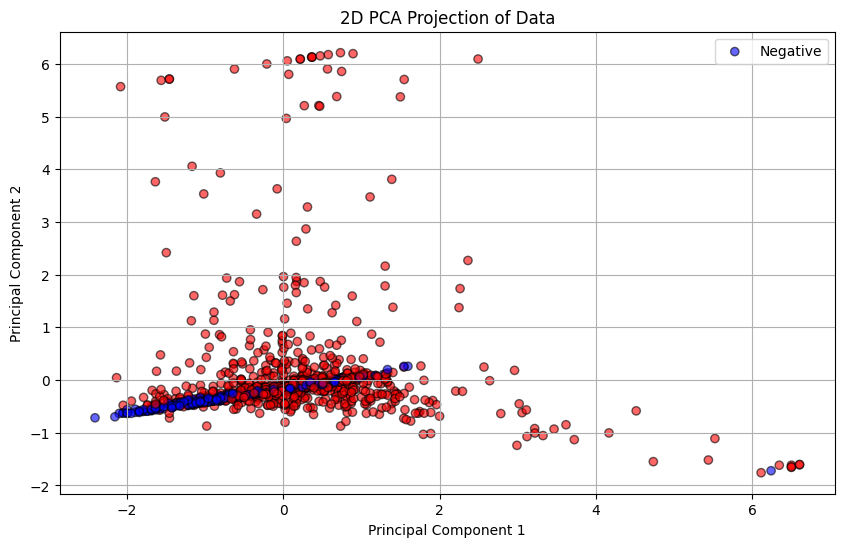

KNN (k=5):
Accuracy: 0.8182
Precision: 0.9481
Recall: 0.7574
F1-score: 0.8421


In [ ]:
#K-NN Model

#checking if kNN could work
from sklearn.decomposition import PCA

#standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#reducing to 2 principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

#plotting PCA-transformed data
plt.figure(figsize=(10, 6))
colors = ['red' if label == 1 else 'blue' for label in y]  # 1 = 'positive', 0 = 'negative'
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, alpha=0.6, edgecolor='k')
plt.title("2D PCA Projection of Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.legend(['Negative', 'Positive'], loc='best')
plt.show()


#knn model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

print("KNN (k=5):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knn):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_knn):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_knn):.4f}")

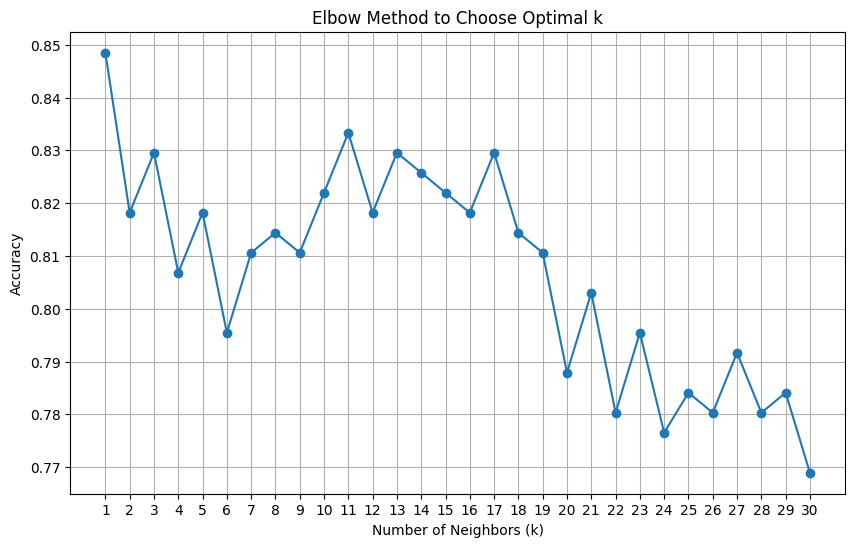

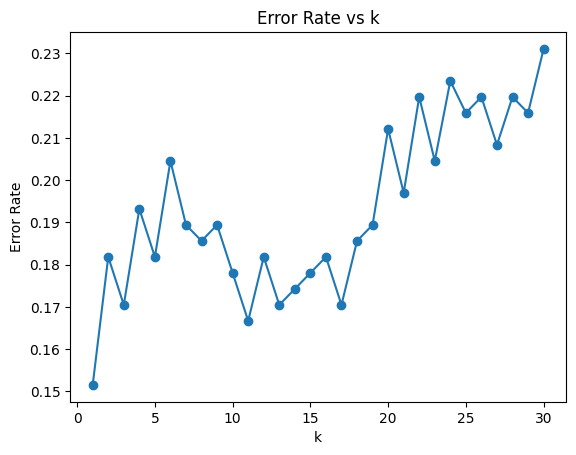

KNN (k=11):
Accuracy: 0.8333
Precision: 0.9562
Recall: 0.7751
F1-score: 0.8562


In [ ]:
#KNN elbow method to find best k value
#testing different k-values
k_values = list(range(1, 31))
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred_k = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred_k)
    accuracy_scores.append(acc)

#plots the accuracy vs k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o')
plt.title('Elbow Method to Choose Optimal k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

error_rate = [1 - acc for acc in accuracy_scores]
plt.plot(k_values, error_rate, marker='o')
plt.title('Error Rate vs k')
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.show()

#knn model with optimal k according to graph
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

print("KNN (k=11):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knn):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_knn):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_knn):.4f}")

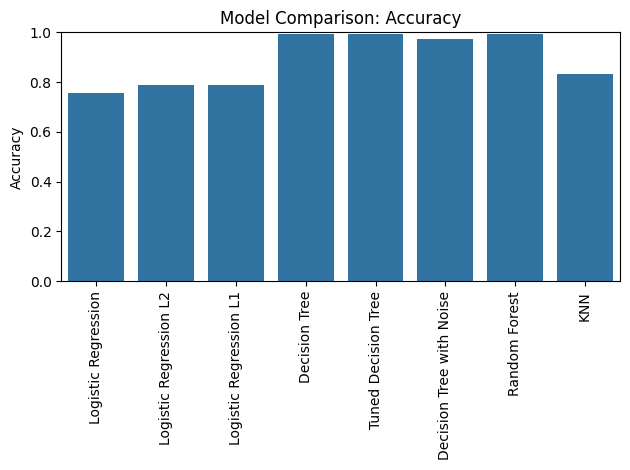

Model Accuracies:

Logistic Regression            Accuracy: 0.7576
Logistic Regression L2         Accuracy: 0.7879
Logistic Regression L1         Accuracy: 0.7879
Decision Tree                  Accuracy: 0.9924
Tuned Decision Tree            Accuracy: 0.9924
Decision Tree with Noise       Accuracy: 0.9747
Random Forest                  Accuracy: 0.9924
KNN                            Accuracy: 0.8333


In [ ]:
#comparing accuracy of all models
models = ['Logistic Regression','Logistic Regression L2', 'Logistic Regression L1','Decision Tree', 'Tuned Decision Tree','Decision Tree with Noise','Random Forest', 'KNN']
#models = ['LR','LR L2', 'LR L1','DT', 'Tuned Decision Tree','Decision Tree with Noise','Random Forest', 'KNN']

accuracies = [
    accuracy_score(y_test, y_pred_lr),
    accuracy_score(y_test, y_pred_L2),
    accuracy_score(y_test, y_pred_L1),
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_dt_pruned),
    accuracy_score(y_test_n, y_pred_n),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_knn)
]

sns.barplot(x=models, y=accuracies)
plt.ylim(0, 1)
plt.title("Model Comparison: Accuracy")
plt.ylabel("Accuracy")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

print("Model Accuracies:\n")
for model, acc in zip(models, accuracies):
    print(f"{model:<30} Accuracy: {acc:.4f}")
